# Suicidality Analysis for assorted demographic Mental Health Records

### Aryaman-Arya
### Sanjam-Bedi

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

In [60]:
data = pd.read_csv(r"D:\master.csv")

In [61]:
data

,country,population,gender,age,generation,year,suicides/100k pop,country-year,gdp_per_capita ($),suicides_no
0,Albania,312900,male,15-24 years,Generation X,1987,6.71,Albania1987,796,21
1,Albania,308000,male,35-54 years,Silent,1987,5.19,Albania1987,796,16
2,Albania,289700,female,15-24 years,Generation X,1987,4.83,Albania1987,796,14
3,Albania,21800,male,75+ years,G.I. Generation,1987,4.59,Albania1987,796,1
4,Albania,274300,male,25-34 years,Boomers,1987,3.28,Albania1987,796,9
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,3620833,female,35-54 years,Generation X,2014,2.96,Uzbekistan2014,2309,107
27816,Uzbekistan,348465,female,75+ years,Silent,2014,2.58,Uzbekistan2014,2309,9
27817,Uzbekistan,2762158,male,5-14 years,Generation Z,2014,2.17,Uzbekistan2014,2309,60
27818,Uzbekistan,2631600,female,5-14 years,Generation Z,2014,1.67,Uzbekistan2014,2309,44


In [62]:
df = data.drop(columns=['country','country-year','age'])
print('\033[1m' + 'Columns in updated Dataframe :' + '\033[0m', len(df.columns))

Columns in updated Dataframe : 7


In [63]:
df

,population,gender,generation,year,suicides/100k pop,gdp_per_capita ($),suicides_no
0,312900,male,Generation X,1987,6.71,796,21
1,308000,male,Silent,1987,5.19,796,16
2,289700,female,Generation X,1987,4.83,796,14
3,21800,male,G.I. Generation,1987,4.59,796,1
4,274300,male,Boomers,1987,3.28,796,9
...,...,...,...,...,...,...,...
27815,3620833,female,Generation X,2014,2.96,2309,107
27816,348465,female,Silent,2014,2.58,2309,9
27817,2762158,male,Generation Z,2014,2.17,2309,60
27818,2631600,female,Generation Z,2014,1.67,2309,44


In [64]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

df['generation'] = lc.fit_transform(df['generation'])
df['gender']=lc.fit_transform(df['gender'])

In [65]:
df

,population,gender,generation,year,suicides/100k pop,gdp_per_capita ($),suicides_no
0,312900,1,2,1987,6.71,796,21
1,308000,1,5,1987,5.19,796,16
2,289700,0,2,1987,4.83,796,14
3,21800,1,1,1987,4.59,796,1
4,274300,1,0,1987,3.28,796,9
...,...,...,...,...,...,...,...
27815,3620833,0,2,2014,2.96,2309,107
27816,348465,0,5,2014,2.58,2309,9
27817,2762158,1,3,2014,2.17,2309,60
27818,2631600,0,3,2014,1.67,2309,44


### Exploratory Data Analysis

In [66]:
df.isnull().sum()

population            0
gender                0
generation            0
year                  0
suicides/100k pop     0
gdp_per_capita ($)    0
suicides_no           0
dtype: int64

In [67]:
df.shape

(27820, 7)

In [68]:
df.columns

Index(['population', 'gender', 'generation', 'year', 'suicides/100k pop',
       'gdp_per_capita ($)', 'suicides_no'],
      dtype='object')

In [69]:
df.describe()

,population,gender,generation,year,suicides/100k pop,gdp_per_capita ($),suicides_no
count,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,1.844794e+06,0.500000,2.701869,2001.258375,12.816097,16866.464414,242.574407
std,3.911779e+06,0.500009,1.809836,8.469055,18.961511,18887.576472,902.047917
min,2.780000e+02,0.000000,0.000000,1985.000000,0.000000,251.000000,0.000000
25%,9.749850e+04,0.000000,1.000000,1995.000000,0.920000,3447.000000,3.000000
50%,4.301500e+05,0.500000,2.000000,2002.000000,5.990000,9372.000000,25.000000
75%,1.486143e+06,1.000000,4.000000,2008.000000,16.620000,24874.000000,131.000000
max,4.380521e+07,1.000000,5.000000,2016.000000,224.970000,126352.000000,22338.000000


In [70]:
df.dtypes

population              int64
gender                  int32
generation              int32
year                    int64
suicides/100k pop     float64
gdp_per_capita ($)      int64
suicides_no             int64
dtype: object

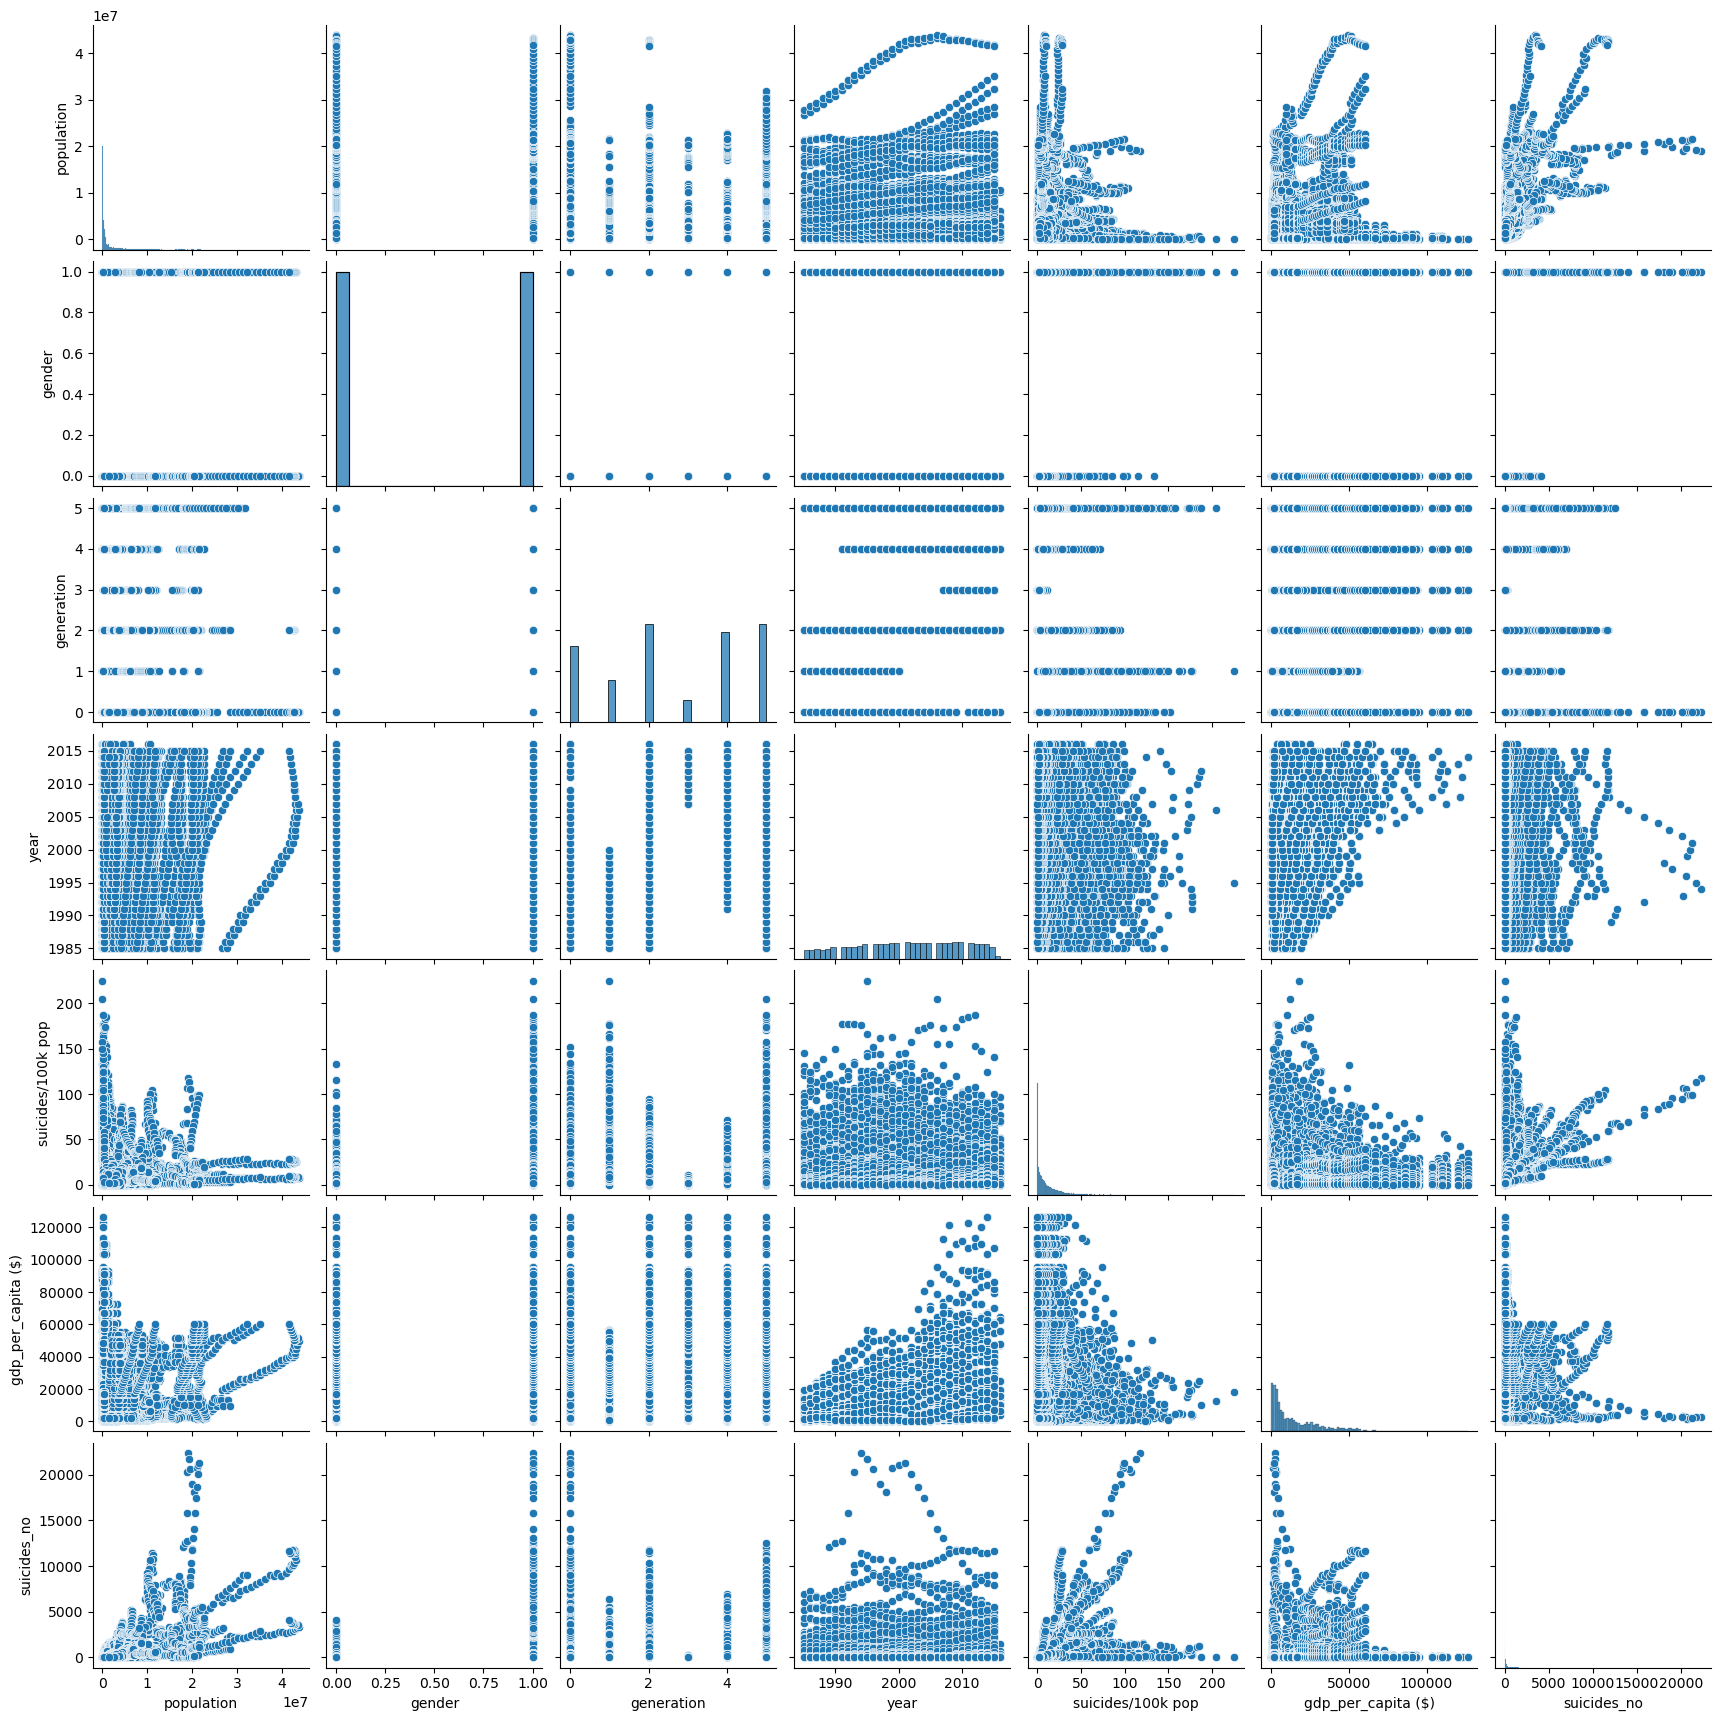

In [71]:
sns.pairplot(df)

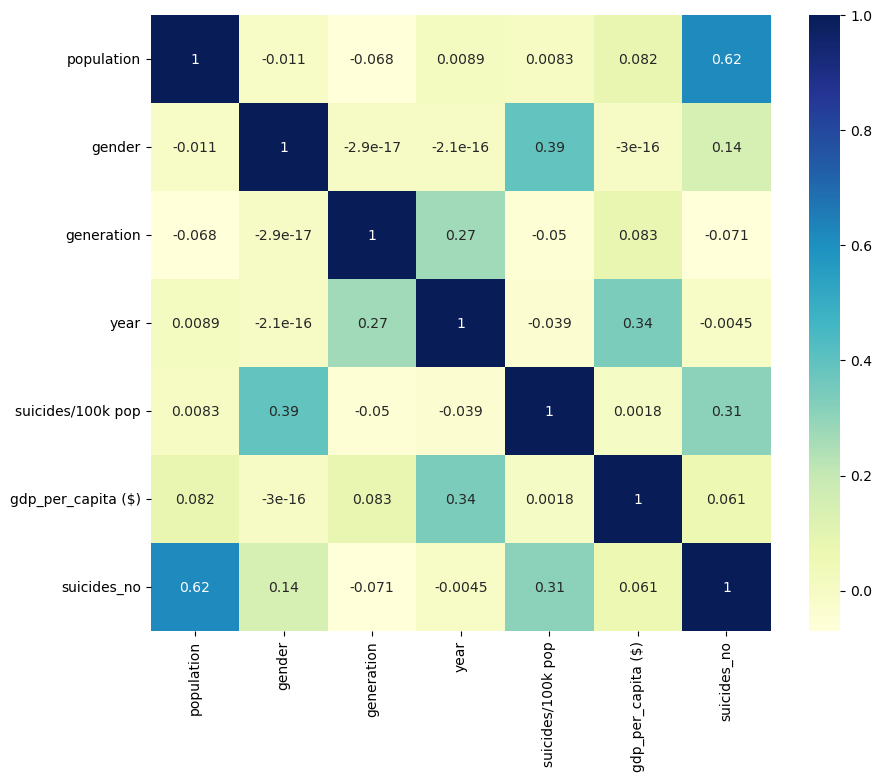

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

### 2. Linear Regression

In [73]:
X=df.iloc[:,:1].values
y=df.iloc[:,-1].values

### 2.1 Without Split

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [75]:
regressor.intercept_

-19.544371255741652

In [76]:
regressor.coef_

array([0.00014209])

In [77]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print("Coeff : %.6f" % regressor.coef_)
print("Intercept : %.3f" % regressor.intercept_)
print("R2 score : %.6f" % r2_score(y, regressor.predict(X)))
print("MSE: %.3f" % mean_squared_error(y,regressor.predict(X)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(X))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(X))))

Coeff : 0.000142
Intercept : -19.544
R2 score : 0.379656
MSE: 504749.890
RMSE: 710.458
MAE: 14.732


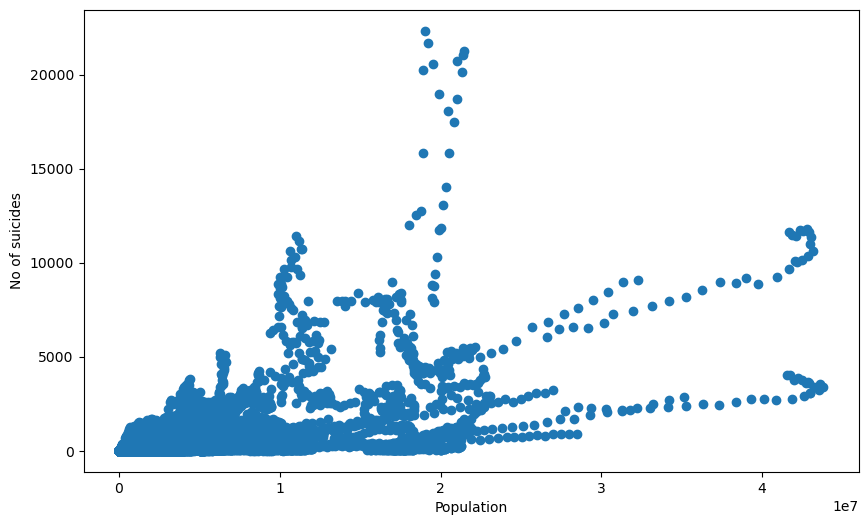

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['population'], y = df['suicides_no'])
plt.xlabel("Population")
plt.ylabel("No of suicides")

plt.show()

In [79]:
X_train

array([[2008],
       [2007],
       [2006],
       ...,
       [2001],
       [1993],
       [2002]], dtype=int64)

<Figure size 800x500 with 0 Axes>

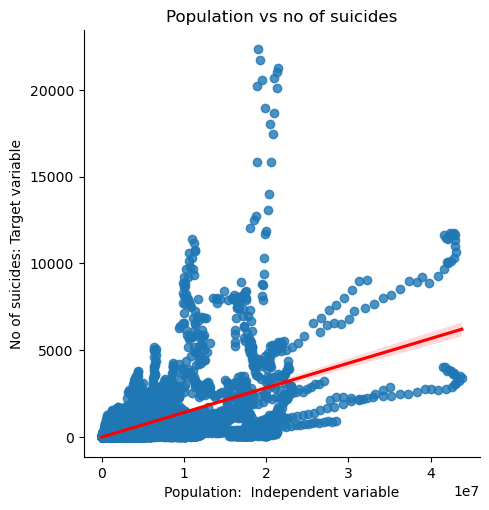

In [169]:
plt.figure(figsize=(8,5))
sns.lmplot(x='population',y='suicides_no',data=df,line_kws={'color': 'red'})
plt.xlabel('Population:  Independent variable')
plt.ylabel('No of suicides: Target variable')
plt.title('Population vs no of suicides');

### SPLITTING DATA INTO TRAINING AND TESTING DATA

####  A. TAKING 70% TRAINING AND 30%TESTING DATA

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [83]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [84]:
regressor.intercept_

-19.657684342496992

In [85]:
regressor.coef_

array([0.00014216])

In [86]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print("Coeff : %.6f" % regressor.coef_)
print("Intercept : %.3f" % regressor.intercept_)
print("R2 score : %.6f" % r2_score(y, regressor.predict(X)))
print("MSE: %.3f" % mean_squared_error(y,regressor.predict(X)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(X))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(X))))

Coeff : 0.000142
Intercept : -19.658
R2 score : 0.379656
MSE: 504749.964
RMSE: 710.458
MAE: 14.734


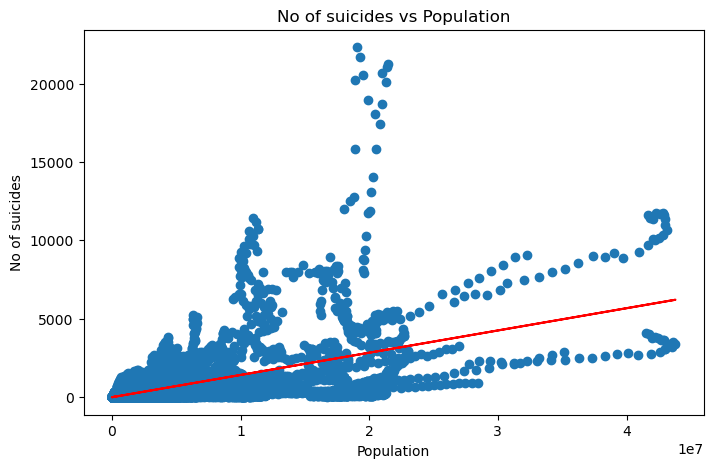

In [87]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('No of suicides vs Population')
plt.xlabel('Population')
plt.ylabel('No of suicides')
plt.show()

#### B. TAKING 80% TRAINING DATA AND 20% TESTING DATA

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=0)

In [89]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [90]:
regressor.intercept_

-19.563274940274454

In [91]:
regressor.coef_

array([0.00014207])

In [92]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print("Coeff : %.6f" % regressor.coef_)
print("Intercept : %.3f" % regressor.intercept_)
print("R2 score : %.6f" % r2_score(y, regressor.predict(X)))
print("MSE: %.3f" % mean_squared_error(y,regressor.predict(X)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(X))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(X))))

Coeff : 0.000142
Intercept : -19.563
R2 score : 0.379656
MSE: 504749.899
RMSE: 710.458
MAE: 14.732


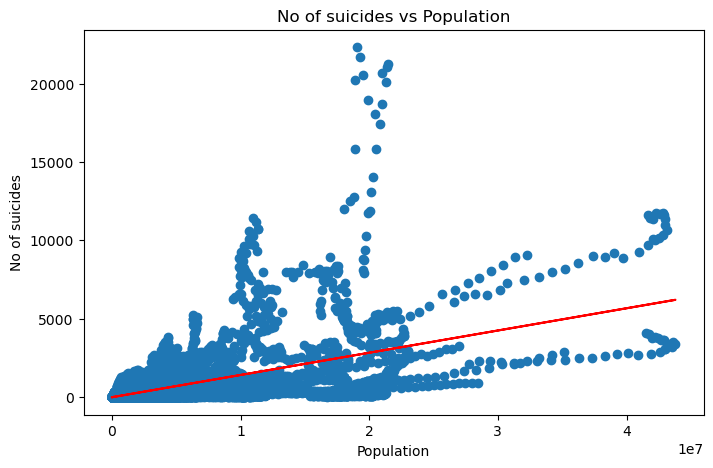

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('No of suicides vs Population')
plt.xlabel('Population')
plt.ylabel('No of suicides')
plt.show()

In [94]:
X_train

array([[   6730],
       [ 580200],
       [3811646],
       ...,
       [4192492],
       [  55825],
       [  97288]], dtype=int64)

#### C. TAKING 50% TRAINING AND 50% TESTING DATA

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [96]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [97]:
lr = LinearRegression()

In [98]:
regressor.intercept_

-19.674831305751553

In [99]:
regressor.coef_

array([0.00014216])

In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print("Coeff : %.6f" % regressor.coef_)
print("Intercept : %.3f" % regressor.intercept_)
print("R2 score : %.6f" % r2_score(y, regressor.predict(X)))
print("MSE: %.3f" % mean_squared_error(y,regressor.predict(X)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(X))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(X))))

Coeff : 0.000142
Intercept : -19.675
R2 score : 0.379656
MSE: 504749.967
RMSE: 710.458
MAE: 14.734


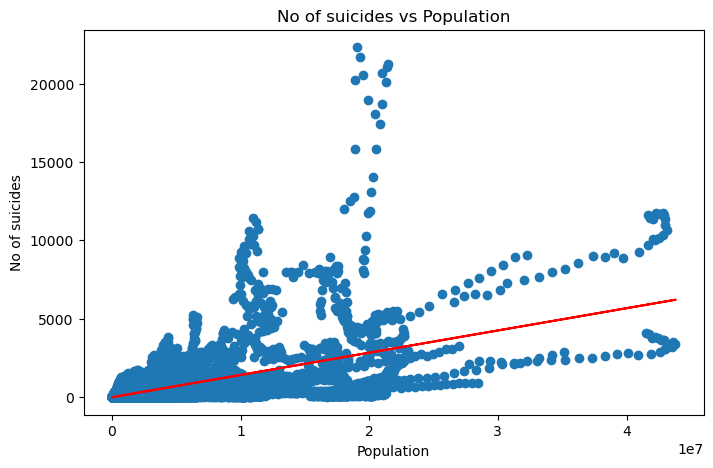

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('No of suicides vs Population')
plt.xlabel('Population')
plt.ylabel('No of suicides')
plt.show()

In [102]:
import numpy as np
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y,epoch,learning_rate,color):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    #epoch = 2000
    n = len(x)
    linear_loss=[]
    #learning_rate = 0.00002

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
    
    plt.plot(np.arange(1,epoch),linear_loss[1:],color=str(color))
    plt.xlabel("Number of epoch")
    plt.ylabel("Loss")
    
    return weight_vector,intercept

In [103]:
x_sr = df.iloc[: , :1].values
y = df.iloc[: , -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

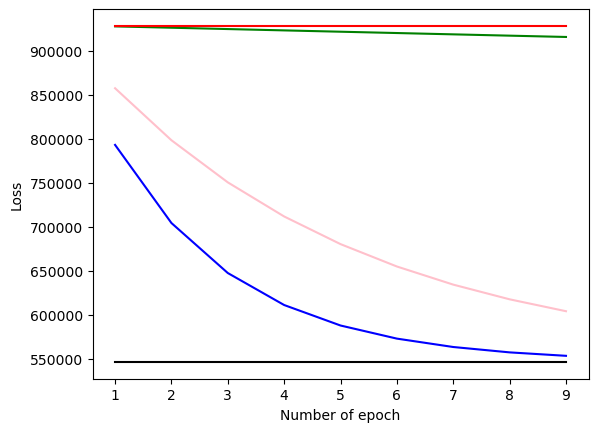

In [104]:
##Gradient Descent Method ( L = 0.1. 001, 0.5, 0.05, 1)
w,b=gradient_descent(X_transform,y_train,10,0.1,'blue')
w,b=gradient_descent(X_transform,y_train,10,0.001,'green')
w,b=gradient_descent(X_transform,y_train,10,0.5,'black')
w,b=gradient_descent(X_transform,y_train,10,1,'red')
w,b=gradient_descent(X_transform,y_train,10,0.05,'pink')

learning rate 0.001
R2 score : -0.025
MSE: 605177.386
RMSE: 777.931
MAE: 14.822 

learning rate 0.05
R2 score : 0.428
MSE: 337870.273
RMSE: 581.266
MAE: 14.461 

learning rate 0.1
R2 score : 0.423
MSE: 340464.649
RMSE: 583.493
MAE: 14.607 

learning rate 0.5
R2 score : 0.423
MSE: 340563.181
RMSE: 583.578
MAE: 14.612 

learning rate 0.75
R2 score : 0.423
MSE: 340563.180
RMSE: 583.578
MAE: 14.612 

learning rate 0.9
R2 score : 0.423
MSE: 340464.805
RMSE: 583.494
MAE: 14.607 

learning rate 0.95
R2 score : 0.428
MSE: 337864.730
RMSE: 581.261
MAE: 14.460 

learning rate 0.99
R2 score : 0.303
MSE: 411232.679
RMSE: 641.274
MAE: 13.587 

learning rate 1
R2 score : -0.091
MSE: 643808.521
RMSE: 802.377
MAE: 15.230 

learning rate 1.1
R2 score : -36552.726
MSE: 21577903911.833
RMSE: 146894.193
MAE: 247.212 

learning rate 1.5
R2 score : -750445464418738048.000
MSE: 442992879225626756644864.000
RMSE: 665577102389.818
MAE: 526153.811 

learning rate 2
R2 score : -27670576832865665928140947456.000


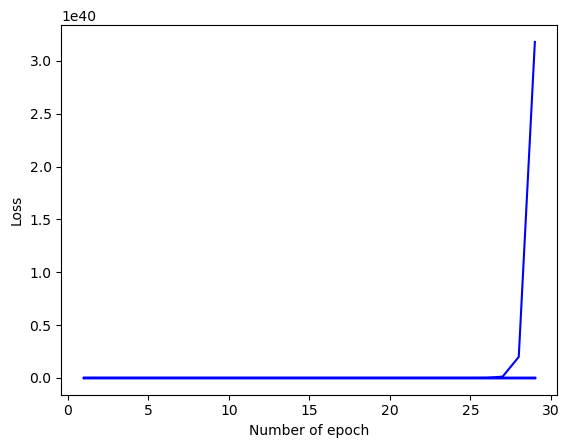

In [105]:
for i in [0.001, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99, 1, 1.1, 1.5, 2, 2.5]:
#for i in [0.9]:
  w,b=gradient_descent(X_transform,y_train,30,i,'blue')
  def predict(inp):
      y_lst=[]
      for i in range(len(inp)):
          y_lst.append(w@inp[i]+b)
      return np.array(y_lst)

  X_test=sc.fit_transform(x_test)
  y_pred=predict(X_test)

  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  from math import sqrt
  print(f"learning rate {i}")
  print("R2 score : %.3f" % r2_score(y_test, y_pred))
  print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
  print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE: %.3f \n" % sqrt(mean_absolute_error(y_test, y_pred)))

learning rate 0.0005
R2 score : -0.056
MSE: 623453.112
RMSE: 789.590
MAE: 15.009 

learning rate 0.001
R2 score : -0.027
MSE: 606284.518
RMSE: 778.643
MAE: 14.822 

learning rate 0.05
R2 score : 0.428
MSE: 337863.941
RMSE: 581.261
MAE: 14.460 

learning rate 0.1
R2 score : 0.423
MSE: 340465.090
RMSE: 583.494
MAE: 14.607 

learning rate 0.5
R2 score : 0.423
MSE: 340563.181
RMSE: 583.578
MAE: 14.612 

learning rate 0.75
R2 score : 0.423
MSE: 340563.180
RMSE: 583.578
MAE: 14.612 

learning rate 0.9
R2 score : 0.423
MSE: 340464.836
RMSE: 583.494
MAE: 14.607 

learning rate 0.95
R2 score : 0.428
MSE: 337866.136
RMSE: 581.263
MAE: 14.460 

learning rate 0.99
R2 score : 0.304
MSE: 411109.849
RMSE: 641.178
MAE: 13.589 

learning rate 1
R2 score : -0.090
MSE: 643166.308
RMSE: 801.977
MAE: 15.230 

learning rate 1.1
R2 score : -36493.056
MSE: 21542680335.775
RMSE: 146774.250
MAE: 247.137 

learning rate 1.5
R2 score : -744331942498112128.000
MSE: 439384027142118264799232.000
RMSE: 662860488445.4

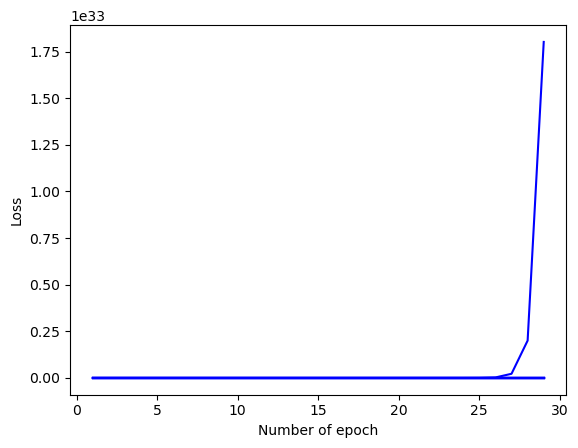

In [106]:
for i in [0.0005,0.001, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99, 1, 1.1, 1.5, 2]:
#for i in [0.9]:
  w,b=gradient_descent(X_transform,y_train,30,i,'blue')
  def predict(inp):
      y_lst=[]
      for i in range(len(inp)):
          y_lst.append(w@inp[i]+b)
      return np.array(y_lst)

  X_test=sc.fit_transform(x_test)
  y_pred=predict(X_test)

  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  from math import sqrt
  print(f"learning rate {i}")
  print("R2 score : %.3f" % r2_score(y_test, y_pred))
  print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
  print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE: %.3f \n" % sqrt(mean_absolute_error(y_test, y_pred)))

learning rate 0.001
R2 score : -0.027
MSE: 606436.161
RMSE: 778.740
MAE: 14.821 

learning rate 0.05
R2 score : 0.428
MSE: 337869.457
RMSE: 581.265
MAE: 14.461 

learning rate 0.1
R2 score : 0.423
MSE: 340465.077
RMSE: 583.494
MAE: 14.607 

learning rate 0.5
R2 score : 0.423
MSE: 340563.181
RMSE: 583.578
MAE: 14.612 

learning rate 0.75
R2 score : 0.423
MSE: 340563.180
RMSE: 583.578
MAE: 14.612 

learning rate 0.9
R2 score : 0.423
MSE: 340464.848
RMSE: 583.494
MAE: 14.607 

learning rate 0.95
R2 score : 0.428
MSE: 337863.539
RMSE: 581.260
MAE: 14.460 

learning rate 0.99
R2 score : 0.304
MSE: 411017.232
RMSE: 641.106
MAE: 13.590 

learning rate 1
R2 score : -0.091
MSE: 644245.726
RMSE: 802.649
MAE: 15.231 

learning rate 1.1
R2 score : -36755.029
MSE: 21697324944.602
RMSE: 147300.119
MAE: 247.465 

learning rate 1.5
R2 score : -746800371952359936.000
MSE: 440841157237440417628160.000
RMSE: 663958701454.722
MAE: 525678.888 

learning rate 2
R2 score : -27724786380983321106755616768.000


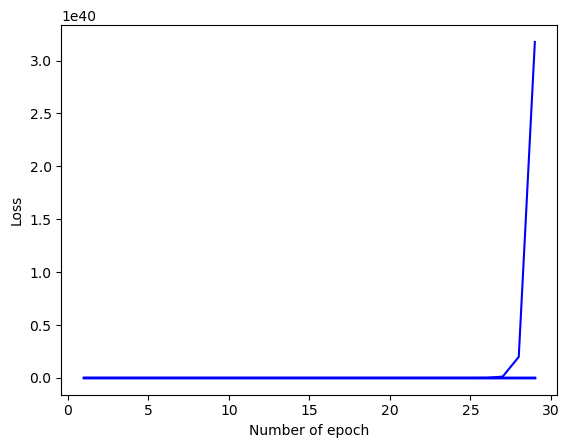

In [107]:
for i in [0.001, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99, 1, 1.1, 1.5, 2, 2.5]:
#for i in [0.9]:
  w,b=gradient_descent(X_transform,y_train,30,i,'blue')
  def predict(inp):
      y_lst=[]
      for i in range(len(inp)):
          y_lst.append(w@inp[i]+b)
      return np.array(y_lst)

  X_test=sc.fit_transform(x_test)
  y_pred=predict(X_test)

  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
  from math import sqrt
  print(f"learning rate {i}")
  print("R2 score : %.3f" % r2_score(y_test, y_pred))
  print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
  print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE: %.3f \n" % sqrt(mean_absolute_error(y_test, y_pred)))

## Multiple Regression

In [108]:
X=df.iloc[:,[1,2]].values
y=df.iloc[:,-1].values

In [111]:
fig = px.scatter_3d(df,x='population',y='gender',z='suicides_no')
fig.show()

### Without Splitting

In [112]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [113]:
regressor.intercept_

207.2197154899048

In [114]:
regressor.coef_

array([260.92020129, -35.19985745])

In [115]:
regressor.predict(X)

array([397.74020189, 292.14062954, 136.82000059, ..., 362.54034444,
       101.62014315, 207.21971549])

In [116]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt


print("R2 score : %.6f" % r2_score(y, regressor.predict(X)))
print("MSE: %.3f" % mean_squared_error(y,regressor.predict(X)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y, regressor.predict(X))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y, regressor.predict(X))))

R2 score : 0.025905
MSE: 792583.054
RMSE: 890.271
MAE: 18.017


### Splitting Training and Testing Data

### Taking 70 as training and 30 as testing

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [118]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [119]:
regressor.intercept_

206.95873408135586

In [120]:
regressor.coef_

array([261.57382977, -35.27640065])

In [121]:
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(X_test))))

R2 score : -0.236
MSE: 476057.532
RMSE: 689.969
MAE: 19.888


### Taking 80% training and 20% testing

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=0)

In [123]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [124]:
regressor.intercept_

207.08513709132012

In [125]:
regressor.coef_

array([261.42858686, -35.29780833])

In [126]:
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(X_test))))

R2 score : -0.256
MSE: 625660.232
RMSE: 790.987
MAE: 20.844


### Taking 50 %training and 50% testing data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [128]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [129]:
regressor.intercept_

207.00194146434865

In [130]:
regressor.coef_

array([261.73001746, -35.28490558])

In [131]:
print("R2 score : %.3f" % r2_score(y_test, regressor.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, regressor.predict(X_test))))

R2 score : -0.178
MSE: 302277.129
RMSE: 549.797
MAE: 17.488


## Polynomial regression

### Without splitting

In [132]:
X=df.iloc[:,:1].values
y=df.iloc[:,-1].values

In [133]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [134]:
from sklearn.preprocessing import PolynomialFeatures
polynom=PolynomialFeatures(degree=1)
X_polynom=polynom.fit_transform(X_train)
X_polynom

array([[1., 1., 2.],
       [1., 0., 5.],
       [1., 1., 3.],
       ...,
       [1., 0., 5.],
       [1., 0., 1.],
       [1., 1., 2.]])

In [135]:
PolyRegr=LinearRegression()
PolyRegr.fit(X_polynom,y_train)

LinearRegression()

In [136]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X)
X_poly

array([[1.000000e+00, 3.129000e+05],
       [1.000000e+00, 3.080000e+05],
       [1.000000e+00, 2.897000e+05],
       ...,
       [1.000000e+00, 2.762158e+06],
       [1.000000e+00, 2.631600e+06],
       [1.000000e+00, 1.438935e+06]])

In [137]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y)


LinearRegression()

In [138]:
#polynomial intercept and coefficient
polyreg.intercept_

-19.544371255741822

In [139]:
polyreg.coef_

array([0.        , 0.00014209])

In [140]:
print("Intercept: %0.3f" % PolyRegr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, PolyRegr.predict(polynom.fit_transform(X_test))))
print("MSE: %.3f" % mean_squared_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test))))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test)))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, PolyRegr.predict(polynom.fit_transform(X_test)))))

Intercept: 207.002
R2 score : -0.178
MSE: 302277.129
RMSE: 549.797
MAE: 17.488


Text(0, 0.5, 'No of suicides')

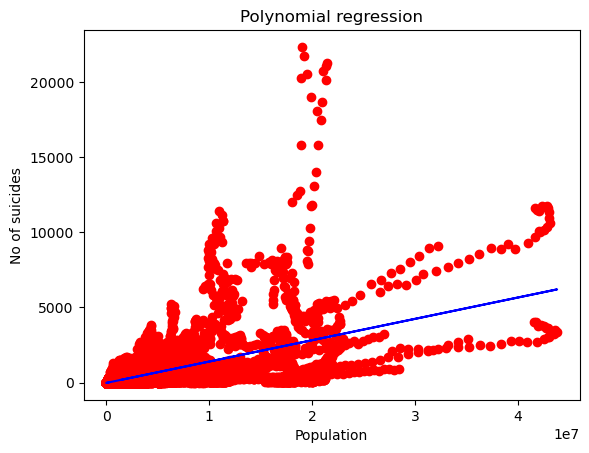

In [141]:
plt.scatter(X,y,color='red')
plt.plot(X,polyreg.predict(poly.fit_transform(X)),color='blue')
plt.title("Polynomial regression")
plt.xlabel("Population")
plt.ylabel("No of suicides")

### 2. SPLITTING TRAINING AND TESTING DATA

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

In [143]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [144]:
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X_train)
X_poly

array([[1.000000e+00, 2.913490e+05],
       [1.000000e+00, 1.052600e+04],
       [1.000000e+00, 3.857800e+04],
       ...,
       [1.000000e+00, 4.192492e+06],
       [1.000000e+00, 5.582500e+04],
       [1.000000e+00, 9.728800e+04]])

In [145]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression()

In [146]:
polyreg.intercept_

-19.657684342496538

In [147]:
polyreg.coef_

array([0.        , 0.00014216])

Text(0, 0.5, 'suicide_no')

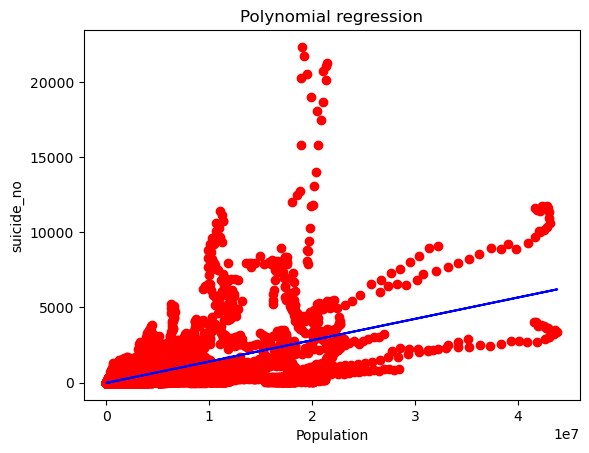

In [148]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,polyreg.predict(poly.fit_transform(X_train)),color='blue')
plt.title("Polynomial regression")
plt.xlabel("Population")
plt.ylabel("suicide_no")

In [149]:
print("Intercept: %0.3f" % PolyRegr.intercept_)


Intercept: 207.002


In [150]:
X = df[['population']]
y= df['suicides_no']

In [151]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.05, normalize = True)
ridgeReg.fit(X,y)
pred = ridgeReg.predict(X)
mse = np.mean((pred-y)**2)
mse

D:\.Importants\ImpSoftwares\Anaconda\envs\arya\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



505450.36892669555

In [152]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print(ridgeReg.coef_)
print("Intercept :%0.3f"% ridgeReg.intercept_)
print("R2 score: %0.3f"% r2_score(y, ridgeReg.predict(X)))
print("MSE: %0.3f"% mean_squared_error(y, ridgeReg.predict(X)))
print("RMSE: %0.3f"% math.sqrt(mean_squared_error(y, ridgeReg.predict(X))))
print("MAE: %0.3f"% math.sqrt(mean_absolute_error(y, ridgeReg.predict(X))))


[0.00013532]
Intercept :-7.063
R2 score: 0.379
MSE: 505450.369
RMSE: 710.950
MAE: 14.554


In [153]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

array([-1.96576843e+01,  1.42155384e-04])

In [154]:
print(lr.ssr)

14036076935.948578


In [155]:
m=len(y)
p=1
hat_sigma_squared=(1/(m-p-1))*76933400.19333948
Cp=(1/m)*(76933400.19333948+2*1* hat_sigma_squared)
Cp

2765.5978213149574

In [156]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:48:24   Log-Likelihood:            -2.2191e+05
No. Observations:               27790   AIC:                         4.438e+05
Df Residuals:                   27788   BIC:                         4.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6577      4.713     -4.171      0.000     -28.896     -10.419
x1             0.0001   1.09e-06    130.391      0.000       0.000       0.000
==============================================================================
Omnibus:                    43805.900   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45977216.965
Skew:                           9.954   Prob(JB):                         0.00
Kurtosis:                     201.269   Cond. No.                     4.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
import numpy as np
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y,epoch,learning_rate,color):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    #epoch = 2000
    n = len(x)
    linear_loss=[]
    #learning_rate = 0.00002

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:],color=str(color))
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in multiply

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:31: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:51: RuntimeWarning:

invalid value encountered in double_scalars



coeff: [nan]
intercept: nan


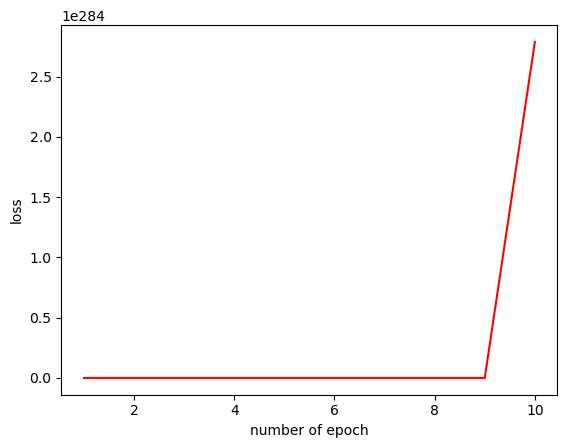

In [158]:
##Gradient Descent Method ( L = 0.1. 001, 0.5, 0.05, 1)
w,b=gradient_descent(X_train,y_train,500,1,'RED')
print("coeff:",w)
print("intercept:",b)

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in multiply

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:31: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:51: RuntimeWarning:

invalid value encountered in double_scalars



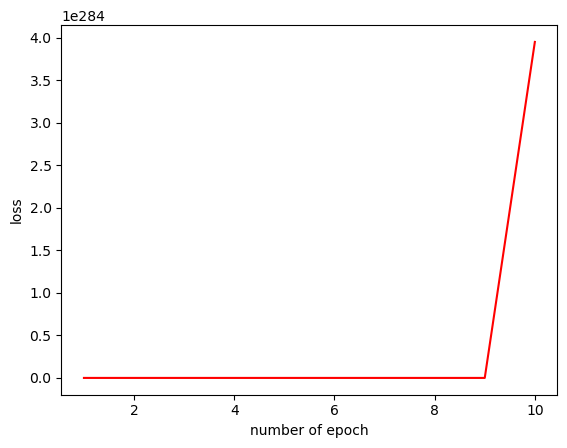

In [159]:
w,b=gradient_descent(X_train,y_train,1000,1,'RED')

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in add

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in multiply

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract



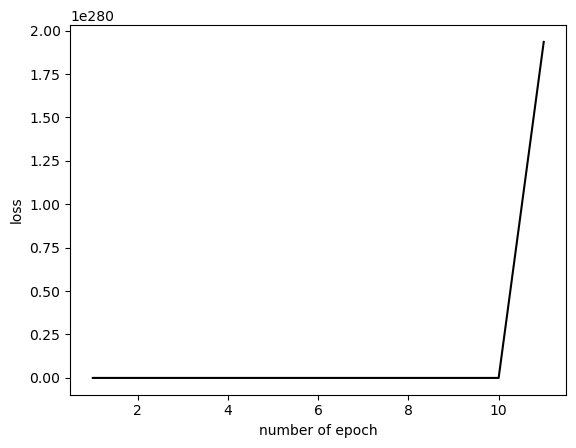

In [160]:
w,b=gradient_descent(X_train,y_train,1000,0.05,'black')

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in add

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in multiply

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract



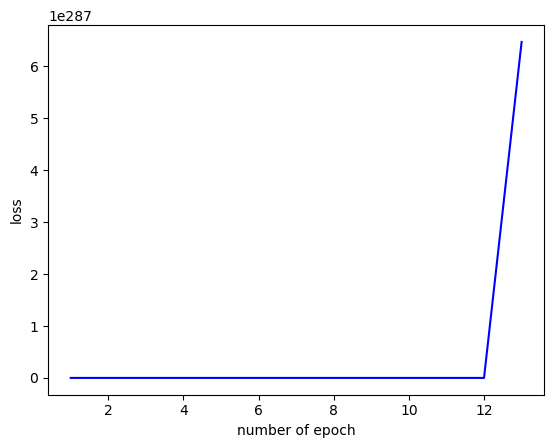

In [161]:
w,b=gradient_descent(X_train,y_train,1000,0.001,'blue')

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in multiply

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract



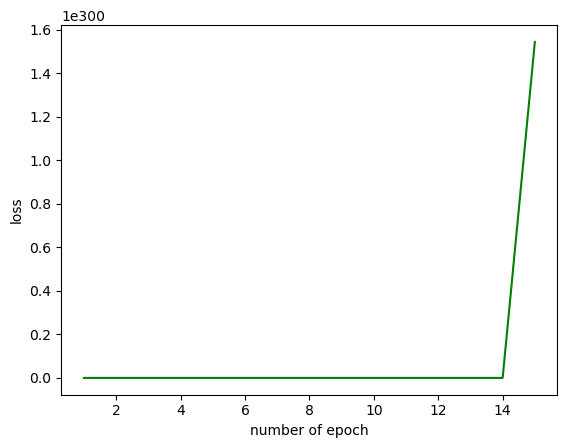

In [163]:
w,b=gradient_descent(X_train,y_train,1000,0.0001,'green')

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:14: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:22: RuntimeWarning:

overflow encountered in add

C:\Users\aryam\AppData\Local\Temp\ipykernel_14512\1002003883.py:48: RuntimeWarning:

invalid value encountered in subtract



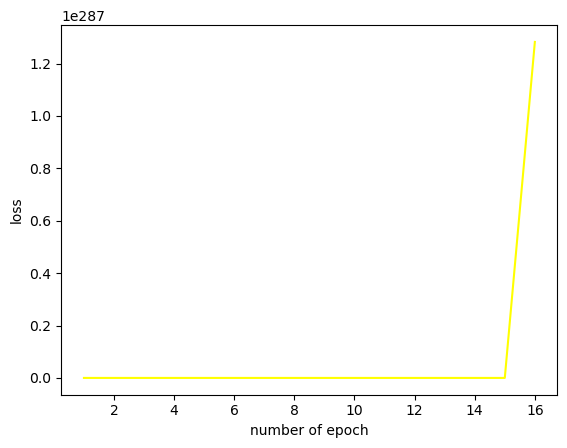

In [164]:
w,b=gradient_descent(X_train,y_train,1000,0.00001,'yellow')

In [165]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [166]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(ridgeReg.coef_)
print("Intercept: %0.3f" % ridgeReg.intercept_)
print("R2 score : %.3f" % r2_score(y, ridgeReg.predict(X)))
print("MSE: %.3f" % mean_squared_error(y, ridgeReg.predict(X)))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y, ridgeReg.predict(X))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y, ridgeReg.predict(X))))

[0.00013532]
Intercept: -7.063
R2 score : 0.379
MSE: 505450.369
RMSE: 710.950
MAE: 14.554


In [167]:
from sklearn.linear_model import Lasso
las = Lasso(alpha = 0.05, normalize = True)
las.fit(X, y)
pred = las.predict(X)
mse = np.mean((pred - y)**2)
mse

D:\.Importants\ImpSoftwares\Anaconda\envs\arya\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



504819.43977455946

In [168]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print(las.coef_)
print("Intercept: %0.3f" % las.intercept_)
print("R2 score : %.3f" % r2_score(y, las.predict(X)))
print("MSE: %.3f" % mean_squared_error(y, las.predict(X)))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y, las.predict(X))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y, las.predict(X))))

[0.00013995]
Intercept: -15.611
R2 score : 0.380
MSE: 504819.440
RMSE: 710.506
MAE: 14.671
